In [41]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

In [42]:
(x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()
x_train.shape

(50000, 32, 32, 3)

In [43]:
x_train[0][0][0]

array([59, 62, 63], dtype=uint8)

In [44]:
x_train[0][0][1]

array([43, 46, 45], dtype=uint8)

In [45]:
x_train[0][0][2]

array([50, 48, 43], dtype=uint8)

In [46]:
x_train[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

In [47]:
x_test.shape

(10000, 32, 32, 3)

In [48]:
classes = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]

In [49]:
y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [50]:
y_train.shape

(50000, 1)

In [51]:
y_train = y_train.reshape(-1)
y_train.shape

(50000,)

In [52]:
y_train

array([6, 9, 9, ..., 9, 1, 1], dtype=uint8)

In [53]:
def plot_img(x,y,num):
  plt.figure(figsize=(15,3))
  plt.imshow(x[num])
  plt.title(classes[y[num]])

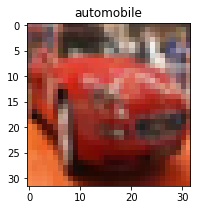

In [54]:
plot_img(x_train,y_train,5)

In [55]:
x_train = x_train/255
x_test = x_test/255

In [56]:
ann = models.Sequential([
    layers.Flatten(input_shape=(32,32,3)),
    layers.Dense(3000, activation = 'relu'),
    layers.Dense(1000, activation= 'relu'),
    layers.Dense(10, activation='sigmoid')
])

ann.compile(
    optimizer = 'SGD',
    loss = 'sparse_categorical_crossentropy', 
    metrics = ['accuracy']
)

ann.fit(x_train, y_train, epochs = 5)

Epoch 1/5
1563/1563 [==============================] - 6s 4ms/step - loss: 1.8127 - accuracy: 0.3555
Epoch 2/5
1563/1563 [==============================] - 6s 4ms/step - loss: 1.6253 - accuracy: 0.4244
Epoch 3/5
1563/1563 [==============================] - 6s 4ms/step - loss: 1.5431 - accuracy: 0.4566
Epoch 4/5
1563/1563 [==============================] - 5s 4ms/step - loss: 1.4838 - accuracy: 0.4783
Epoch 5/5
1563/1563 [==============================] - 5s 3ms/step - loss: 1.4345 - accuracy: 0.4947


In [57]:
ann.evaluate(x_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 1.4605 - accuracy: 0.4821


[1.4605255126953125, 0.4821000099182129]

In [58]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
y_pred = ann.predict(x_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(y_test,y_pred_classes))

Classification Report: 
               precision    recall  f1-score   support

           0       0.55      0.52      0.53      1000
           1       0.55      0.67      0.61      1000
           2       0.39      0.27      0.32      1000
           3       0.43      0.16      0.23      1000
           4       0.44      0.43      0.44      1000
           5       0.37      0.42      0.39      1000
           6       0.44      0.69      0.54      1000
           7       0.70      0.39      0.50      1000
           8       0.50      0.72      0.59      1000
           9       0.49      0.56      0.52      1000

    accuracy                           0.48     10000
   macro avg       0.49      0.48      0.47     10000
weighted avg       0.49      0.48      0.47     10000



In [59]:
cnn = models.Sequential([
    
    #cnn
    layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    #dense
    layers.Flatten(),
    layers.Dense(64, activation = 'relu'),
    layers.Dense(10, activation='softmax') 
])

In [60]:
cnn.compile(
    optimizer = 'SGD',
    loss = 'sparse_categorical_crossentropy', 
    metrics = ['accuracy']
)

In [61]:
cnn.fit(x_train,y_train,epochs=10)

Epoch 1/10
1563/1563 [==============================] - 6s 4ms/step - loss: 1.9825 - accuracy: 0.2805
Epoch 2/10
1563/1563 [==============================] - 7s 4ms/step - loss: 1.5772 - accuracy: 0.4365
Epoch 3/10
1563/1563 [==============================] - 9s 6ms/step - loss: 1.4083 - accuracy: 0.4988
Epoch 4/10
1563/1563 [==============================] - 6s 4ms/step - loss: 1.3047 - accuracy: 0.5378
Epoch 5/10
1563/1563 [==============================] - 6s 4ms/step - loss: 1.2244 - accuracy: 0.5710
Epoch 6/10
1563/1563 [==============================] - 6s 4ms/step - loss: 1.1538 - accuracy: 0.5965
Epoch 7/10
1563/1563 [==============================] - 6s 4ms/step - loss: 1.0937 - accuracy: 0.6202
Epoch 8/10
1563/1563 [==============================] - 6s 4ms/step - loss: 1.0388 - accuracy: 0.6382
Epoch 9/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.9912 - accuracy: 0.6575
Epoch 10/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.950

In [63]:
cnn.evaluate(x_test,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 1.0205 - accuracy: 0.6503


[1.0204721689224243, 0.6503000259399414]

In [64]:
# sigmoid
# 1: 0.45
# 2: 0.67

# softmax
# 1: (0.45)/(0.45+0.67)
# 2: (0.67)/(0.45+0.67)

In [65]:
y_test  # 2d

array([[3],
       [8],
       [8],
       ...,
       [5],
       [1],
       [7]], dtype=uint8)

In [66]:
y_test = y_test.reshape(-1) # 1d

In [67]:
y_test

array([3, 8, 8, ..., 5, 1, 7], dtype=uint8)

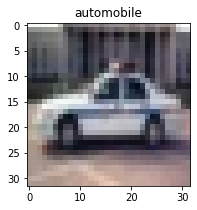

In [69]:
plot_img(x_test,y_test,104)

In [70]:
y_pred = cnn.predict(x_test)
y_pred[:5]

array([[1.13611575e-02, 9.79608856e-04, 4.46557440e-02, 5.57868183e-01,
        6.15657959e-03, 2.96578407e-01, 4.40689139e-02, 3.22572305e-03,
        3.35898735e-02, 1.51574949e-03],
       [2.72995412e-01, 2.97018975e-01, 3.90597008e-04, 4.22096709e-05,
        1.28576154e-04, 1.77424936e-05, 5.11760163e-06, 1.02193058e-04,
        3.83179784e-01, 4.61194403e-02],
       [6.51186258e-02, 2.13367566e-01, 1.59632287e-03, 1.67657912e-03,
        1.12877367e-03, 3.74798867e-04, 2.33892570e-04, 1.03561499e-03,
        6.70072317e-01, 4.53955159e-02],
       [5.57570040e-01, 9.72708464e-02, 4.16283943e-02, 4.51571401e-03,
        6.74938112e-02, 3.38310259e-04, 3.72776366e-03, 3.03040911e-03,
        2.21743017e-01, 2.68164533e-03],
       [1.77208160e-04, 3.84162035e-04, 3.87831181e-02, 2.18307167e-01,
        3.92625958e-01, 8.84743929e-02, 2.59625137e-01, 7.02505000e-04,
        7.36315793e-04, 1.84093864e-04]], dtype=float32)

In [71]:
y_pred_class = [np.argmax(ele) for ele in y_pred]
y_pred_class[:5]

[3, 8, 8, 0, 4]

In [72]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

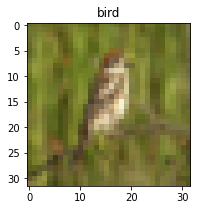

In [74]:
plot_img(x_test, y_test, 138)

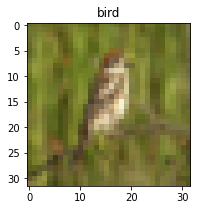

In [75]:
plot_img(x_test, y_pred_class, 138)

In [76]:
print("Classification Report \n", classification_report(y_test,y_pred_class))

Classification Report 
               precision    recall  f1-score   support

           0       0.70      0.69      0.70      1000
           1       0.80      0.74      0.77      1000
           2       0.63      0.43      0.51      1000
           3       0.45      0.55      0.50      1000
           4       0.73      0.41      0.53      1000
           5       0.49      0.64      0.56      1000
           6       0.69      0.79      0.74      1000
           7       0.64      0.74      0.68      1000
           8       0.78      0.75      0.76      1000
           9       0.71      0.76      0.74      1000

    accuracy                           0.65     10000
   macro avg       0.66      0.65      0.65     10000
weighted avg       0.66      0.65      0.65     10000

